In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nengo
import time
palette = sns.color_palette("tab10")
sns.set_palette(palette)
sns.set(context='notebook', style='white')

In [2]:
def load_values(load=False, monkeys=['V', 'W'], sessions=[0,1,2,3], blocks=range(1,25)):
    if load:
        nef_values = pd.read_pickle("data/nef_values.pkl")
    else:
        emp = pd.read_pickle("data/empirical.pkl")
        nef_dfs = []
        rl_dfs = []
        for monkey in monkeys:
            for session in sessions:
                for block in blocks:
                    file = f"monkey{monkey}_session{session}_block{block}"
                    nef_dfs.append(pd.read_pickle(f'data/nef/{file}_values.pkl'))
        nef_values = pd.concat(nef_dfs, ignore_index=True)
        nef_values.to_pickle("data/nef_values.pkl")
    return nef_values

In [3]:
nef_values = load_values(False, monkeys=['V'], sessions=[1], blocks=[1])

In [4]:
nef_values

,monkey,session,block,trial,block_type,perturb,pre,post,va,vb,vl,vr,w,al,ar,clet,cloc,rew,acc
0,V,1,1,1,what,-0.2,1,-1,-0.005885,-0.001546,-0.001837,-0.009027,0.295411,-0.077408,0.082235,A,right,-1,0
1,V,1,1,2,what,-0.2,2,-1,-0.023809,-0.148466,0.009421,-0.194980,0.330733,-0.090668,-0.041860,A,right,-1,0
2,V,1,1,3,what,-0.2,3,-1,-0.029602,-0.281215,0.021197,-0.346891,0.358000,-0.052591,-0.217725,B,left,1,1
3,V,1,1,4,what,-0.2,4,-1,-0.202102,0.104902,0.164404,-0.236214,0.332134,-0.005128,-0.044947,A,left,-1,0
4,V,1,1,5,what,-0.2,5,-1,-0.348436,0.048594,-0.024035,-0.157658,0.303218,-0.185213,-0.015431,B,right,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,V,1,1,76,what,0.2,-1,35,-0.072015,0.184961,0.234969,-0.069180,0.973289,-0.044596,0.226594,A,right,1,1
396,V,1,1,77,what,0.2,-1,36,0.289882,-0.071215,0.210102,0.042123,0.978186,0.277613,-0.027154,A,left,1,1
397,V,1,1,78,what,0.2,-1,37,-0.074895,0.412160,0.323382,0.062505,0.980207,0.001272,0.487066,A,right,1,1
398,V,1,1,79,what,0.2,-1,38,0.478847,-0.076688,0.266272,0.158917,0.984926,0.483584,-0.027805,A,left,-1,1


## Confirm learning

/tmp/ipykernel_1278795/2353985370.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(nef_values.query("block_type=='what'"), x='pre', y='acc', hue='perturb', palette=palette, ax=axes[0])
/tmp/ipykernel_1278795/2353985370.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(nef_values.query("block_type=='what'"), x='post', y='acc', hue='perturb', palette=palette, ax=axes[1])
/tmp/ipykernel_1278795/2353985370.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(nef_values.query("block_type=='where'"), x='pre', y='acc', hue='perturb', palette=palette, ax=axes[2])
/tmp/ipykernel_1278795/2353985370.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(nef_values.query("block_type=='where'"), x='post', y='acc', hue='perturb', palette=palette, ax=axes[3])


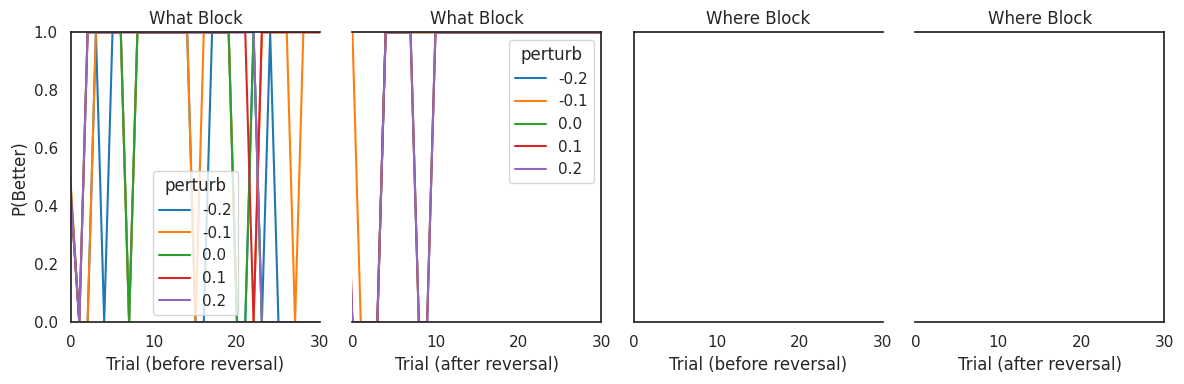

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(12, 4))
sns.lineplot(nef_values.query("block_type=='what'"), x='pre', y='acc', hue='perturb', palette=palette, ax=axes[0])
sns.lineplot(nef_values.query("block_type=='what'"), x='post', y='acc', hue='perturb', palette=palette, ax=axes[1])
sns.lineplot(nef_values.query("block_type=='where'"), x='pre', y='acc', hue='perturb', palette=palette, ax=axes[2])
sns.lineplot(nef_values.query("block_type=='where'"), x='post', y='acc', hue='perturb', palette=palette, ax=axes[3])
axes[0].set(ylabel="P(Better)", xlabel='Trial (before reversal)', title='What Block', xlim=(0, 30), ylim=(0,1))
axes[1].set(xlabel='Trial (after reversal)', title='What Block')
axes[2].set(xlabel='Trial (before reversal)', title='Where Block')
axes[3].set(xlabel='Trial (after reversal)', title='Where Block')
axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[3].spines['left'].set_visible(False)
fig.tight_layout()

/tmp/ipykernel_1278795/251304647.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(nef_values.query("block_type=='what'"), x='pre', y='w', hue='perturb', palette=palette, ax=axes[0])
/tmp/ipykernel_1278795/251304647.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(nef_values.query("block_type=='what'"), x='post', y='w', hue='perturb', palette=palette, ax=axes[1])
/tmp/ipykernel_1278795/251304647.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(nef_values.query("block_type=='where'"), x='pre', y='w', hue='perturb', palette=palette, ax=axes[2])
/tmp/ipykernel_1278795/251304647.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(nef_values.query("block_type=='where'"), x='post', y='w', hue='perturb', palette=palette, ax=axes[3])


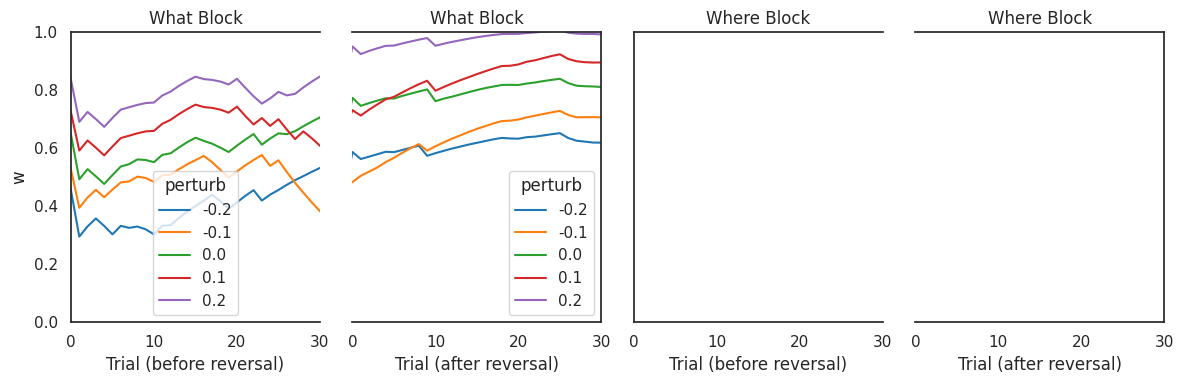

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(12, 4))
sns.lineplot(nef_values.query("block_type=='what'"), x='pre', y='w', hue='perturb', palette=palette, ax=axes[0])
sns.lineplot(nef_values.query("block_type=='what'"), x='post', y='w', hue='perturb', palette=palette, ax=axes[1])
sns.lineplot(nef_values.query("block_type=='where'"), x='pre', y='w', hue='perturb', palette=palette, ax=axes[2])
sns.lineplot(nef_values.query("block_type=='where'"), x='post', y='w', hue='perturb', palette=palette, ax=axes[3])
axes[0].set(xlabel='Trial (before reversal)', title='What Block', xlim=(0, 30), ylim=(0,1))
axes[1].set(xlabel='Trial (after reversal)', title='What Block')
axes[2].set(xlabel='Trial (before reversal)', title='Where Block')
axes[3].set(xlabel='Trial (after reversal)', title='Where Block')
axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[3].spines['left'].set_visible(False)
fig.tight_layout()

## Compute Differential Response

In [23]:
def add_DR(data):
    dfs = []
    columns = ['monkey', 'session', 'block', 'block_type', 'DR_let', 'DR_loc']
    for monkey in data['monkey'].unique():
        for session in data.query("monkey==@monkey")['session'].unique():
            for block in data.query("monkey==@monkey & session==@session")['block'].unique():
                subdata = data.query("monkey==@monkey & session==@session & block==@block")
                block_type = subdata['block_type'].values[0]
                n_stay_let_win = 0
                n_stay_let_lose = 0
                n_stay_loc_win = 0
                n_stay_loc_lose = 0
                for trial in subdata['trial'].unique()[1:]:
                    reward = subdata.query("trial==@trial")['rew'].values[0]
                    past_trial = trial - 1
                    past_let = subdata.query("trial==@past_trial")['clet'].values[0]
                    current_let = subdata.query("trial==@trial")['clet'].values[0]
                    past_loc = subdata.query("trial==@past_trial")['cloc'].values[0]
                    current_loc = subdata.query("trial==@trial")['cloc'].values[0]
                    if current_let==past_let:
                        if reward==1:
                            n_stay_let_win += 1
                        else:
                            n_stay_let_lose += 1
                    if current_loc==past_loc:
                        if reward==1:
                            n_stay_loc_win += 1
                        else:
                            n_stay_loc_lose += 1
                if n_stay_let_win + n_stay_let_lose > 0:
                    p_stay_let_win = n_stay_let_win / (n_stay_let_win + n_stay_let_lose)
                    p_stay_let_lose = n_stay_let_lose / (n_stay_let_win + n_stay_let_lose)
                    DR_let = p_stay_let_win - p_stay_let_lose
                else:
                    DR_let = None
                if n_stay_loc_win + n_stay_loc_lose > 0:
                    p_stay_loc_win = n_stay_loc_win / (n_stay_loc_win + n_stay_loc_lose)
                    p_stay_loc_lose = n_stay_loc_lose / (n_stay_loc_win + n_stay_loc_lose)
                    DR_loc = p_stay_loc_win - p_stay_loc_lose
                else:
                    DR_loc = None
                dfs.append(pd.DataFrame([[monkey, session, block, block_type, DR_let, DR_loc]], columns=columns))
    dr_data = pd.concat(dfs, ignore_index=True)
    return dr_data

In [24]:
nef_dr = add_DR(nef_values)

In [25]:
nef_dr

,monkey,session,block,block_type,DR_let,DR_loc
0,V,1,1,what,0.287671,0.150000
1,V,1,2,what,0.194444,0.024390
2,V,1,3,what,0.169231,0.087719
3,V,1,4,what,0.378378,0.380952
4,V,1,22,where,0.272727,0.362319
5,V,1,23,where,-0.061224,0.106383
6,V,1,24,where,0.392857,0.368421


<Axes: xlabel='DR_let', ylabel='DR_loc'>

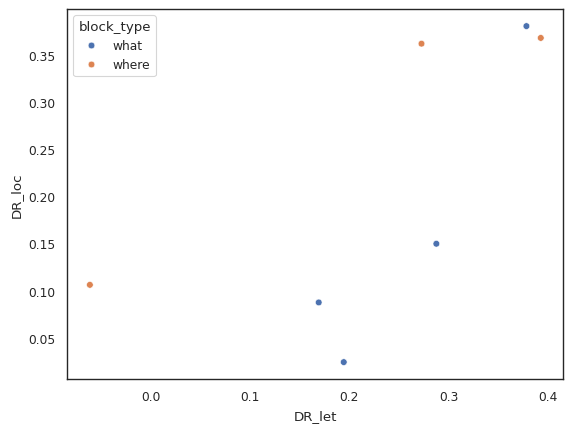

In [28]:
fig, ax = plt.subplots()
sns.scatterplot(data=nef_dr, x='DR_let', y='DR_loc', hue='block_type')